In [5]:
import os
import pandas as pd
from ucimlrepo import fetch_ucirepo
from ydata_profiling import ProfileReport
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# Set the default working directory
documents_path = r'C:\Users\matth\OneDrive\Documents'
os.chdir(documents_path)
print(f"Current working directory set to: {os.getcwd()}")

# Combine x and y
combined_df = X.copy()
combined_df['target'] = y

# Convert to CSV
csv_filename = 'heart_disease_combined.csv'
combined_df.to_csv(csv_filename, index=False)
df = pd.read_csv(csv_filename, encoding='latin1')

# Display the first few rows of the dataset
print(df.head())

# Drop null values
df_cleaned = df.dropna().copy()

# Change target to binary
df_cleaned.loc[:, 'target'] = df_cleaned['target'].apply(lambda x: 1 if x != 0 else 0)
df_cleaned.loc[:, 'target'] = df_cleaned['target'].astype('category')

# Convert object-type columns to 'category' data type
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object' or df_cleaned[col].nunique() < 10:
        df_cleaned[col] = df_cleaned[col].astype('category')

%pip install --upgrade ydata-profiling

profile = ProfileReport(df_cleaned, title='Exploratory Analysis Report')
profile.to_file('Exploratory_analysis_report.html')

Current working directory set to: C:\Users\matth\OneDrive\Documents
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\matth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 125.56it/s]


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach  -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal      0.126586  0.383652  0.268500  0.138183  0.010859  0.06

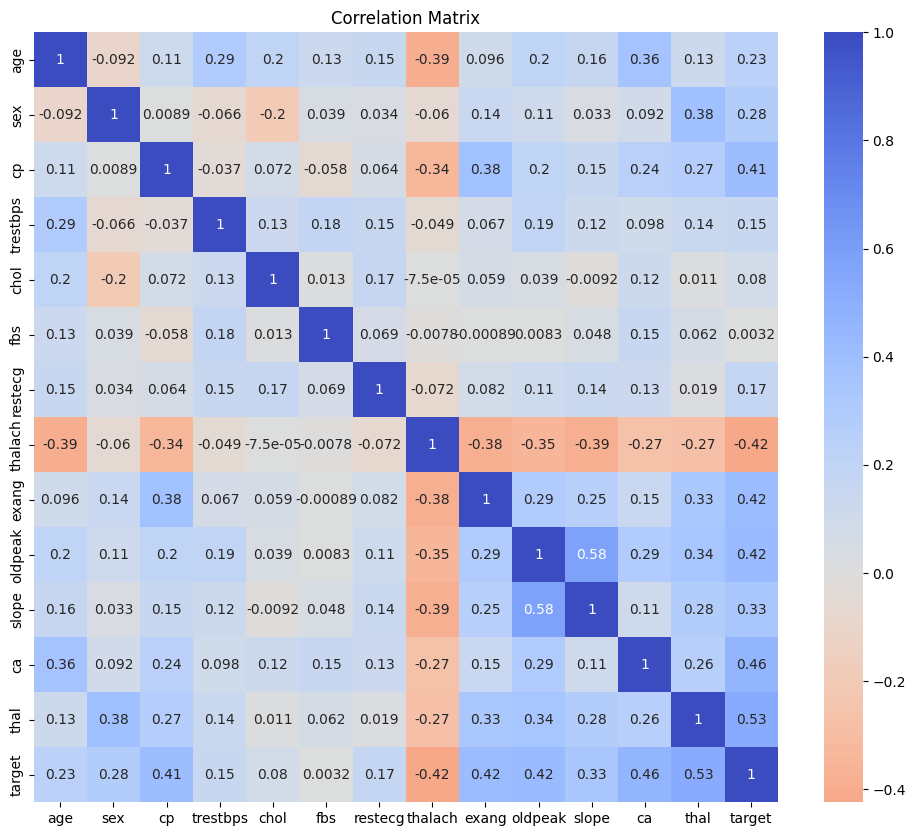

Heatmap saved as 'C:\Users\matth\OneDrive\Documents\correlation_matrix_heatmap.png'


<Figure size 640x480 with 0 Axes>

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Create a corelation matrix
correlation_matrix = df_cleaned.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True,  cmap='coolwarm_r', center=0)
plt.title('Correlation Matrix')
plt.show()
output_path = r'C:\Users\matth\OneDrive\Documents\correlation_matrix_heatmap.png'
plt.savefig(output_path)
print(f"Heatmap saved as '{output_path}'")

In [12]:
import pandas as pd 
from IPython.display import display

# Select categorical variables
categorical_columns = df_cleaned.select_dtypes(include=['category']).columns

# Create frequency tables for each categorical variable
for col in categorical_columns:
    frequency_table = df_cleaned[col].value_counts().reset_index()
    frequency_table.columns = [col, 'Frequency']
    frequency_table['Relative Frequency'] = frequency_table['Frequency'] / frequency_table['Frequency'].sum()
    print(f"Frequency Table for '{col}':\n", frequency_table, "\n")



# Creating a contingency table
def create_contingency_table(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    display(contingency_table)
    return contingency_table

create_contingency_table(df_cleaned, "sex", "target")
create_contingency_table(df_cleaned, "cp", "target")
create_contingency_table(df_cleaned, "fbs", "target")
create_contingency_table(df_cleaned, "restecg", "target")
create_contingency_table(df_cleaned, "exang", "target")
create_contingency_table(df_cleaned, "slope", "target")
create_contingency_table(df_cleaned, "ca", "target")
create_contingency_table(df_cleaned, "thal", "target")



Frequency Table for 'sex':
   sex  Frequency  Relative Frequency
0   1        201            0.676768
1   0         96            0.323232 

Frequency Table for 'cp':
   cp  Frequency  Relative Frequency
0  4        142            0.478114
1  3         83            0.279461
2  2         49            0.164983
3  1         23            0.077441 

Frequency Table for 'fbs':
   fbs  Frequency  Relative Frequency
0   0        254            0.855219
1   1         43            0.144781 

Frequency Table for 'restecg':
   restecg  Frequency  Relative Frequency
0       0        147            0.494949
1       2        146            0.491582
2       1          4            0.013468 

Frequency Table for 'exang':
   exang  Frequency  Relative Frequency
0     0        200            0.673401
1     1         97            0.326599 

Frequency Table for 'slope':
   slope  Frequency  Relative Frequency
0     1        139            0.468013
1     2        137            0.461279
2     3        

target,0,1
sex,,
0,71,25
1,89,112


target,0,1
cp,,
1,16,7
2,40,9
3,65,18
4,39,103


target,0,1
fbs,,
0,137,117
1,23,20


target,0,1
restecg,,
0,92,55
1,1,3
2,67,79


target,0,1
exang,,
0,137,63
1,23,74


target,0,1
slope,,
1,103,36
2,48,89
3,9,12


target,0,1
ca,,
0.0,129,45
1.0,21,44
2.0,7,31
3.0,3,17


target,0,1
thal,,
3.0,127,37
6.0,6,12
7.0,27,88


target,0,1
thal,,
3.0,127,37
6.0,6,12
7.0,27,88


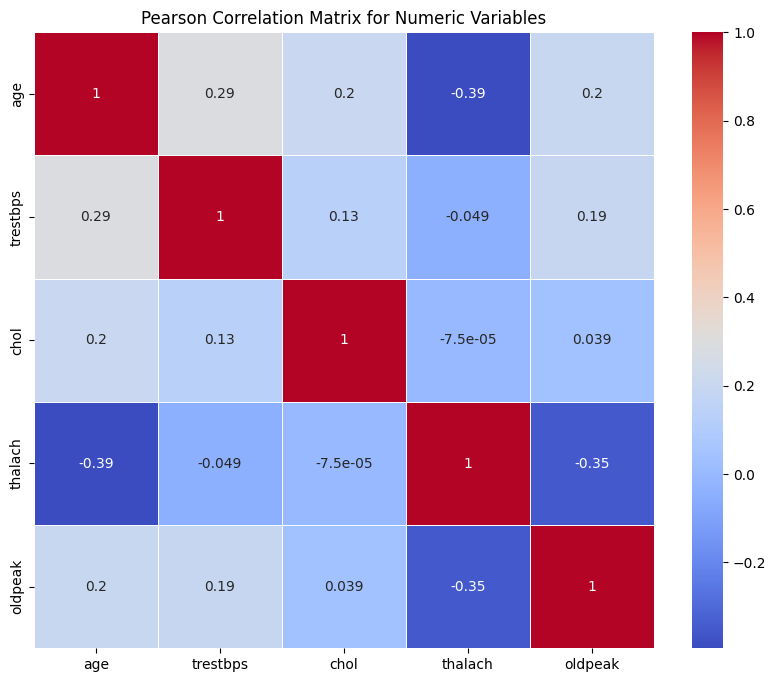

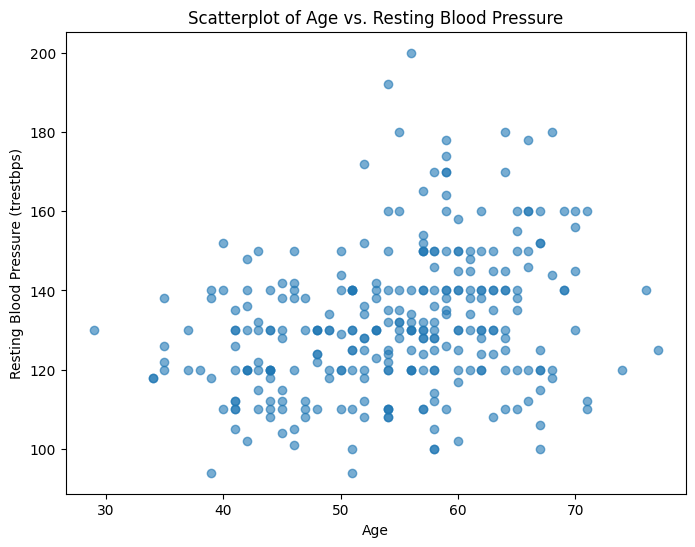

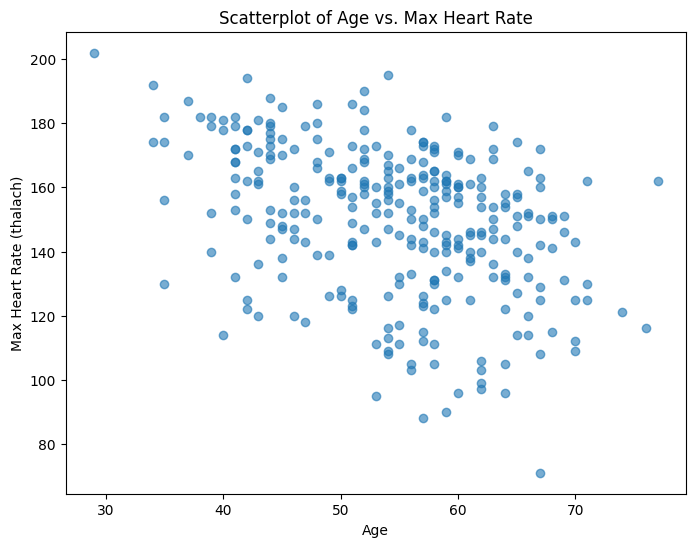

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the dataset
numeric_data = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the Pearson correlation matrix
pearson_corr = numeric_data.corr(method='pearson')

# Plotting the Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Matrix for Numeric Variables')
plt.show()

# Scatter plot of Age vs. Resting Blood Pressure (trestbps)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['age'], df_cleaned['trestbps'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.title('Scatterplot of Age vs. Resting Blood Pressure')
plt.show()

# Scatter plot of Age vs. Max Heart Rate (thalach)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['age'], df_cleaned['thalach'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.title('Scatterplot of Age vs. Max Heart Rate')
plt.show()

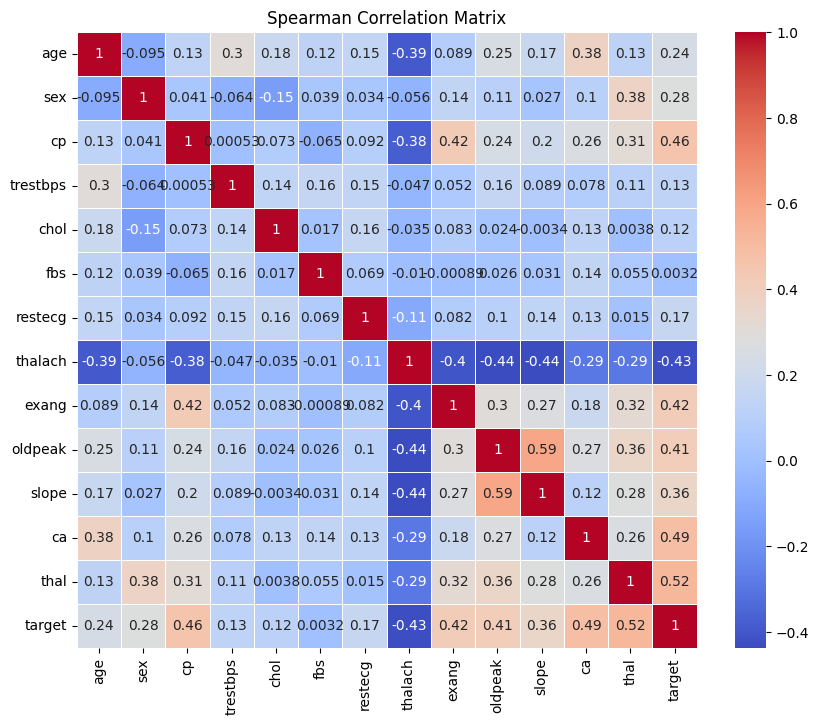

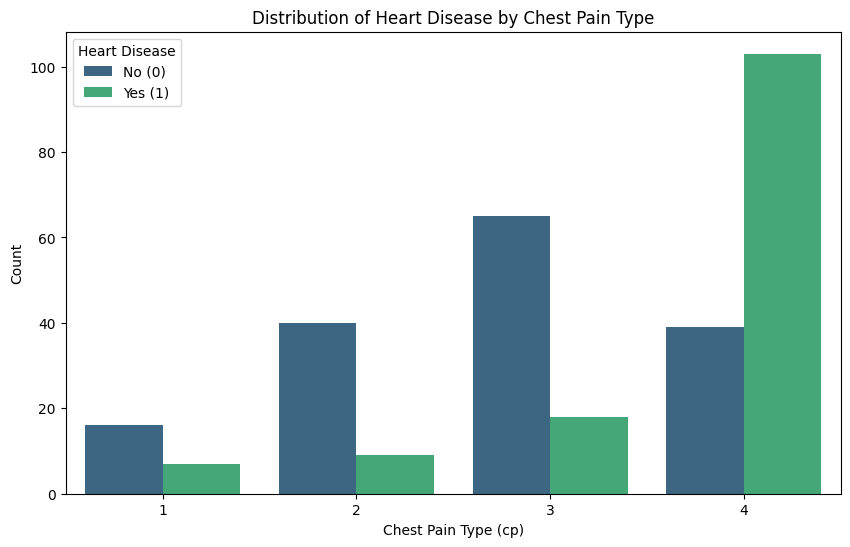

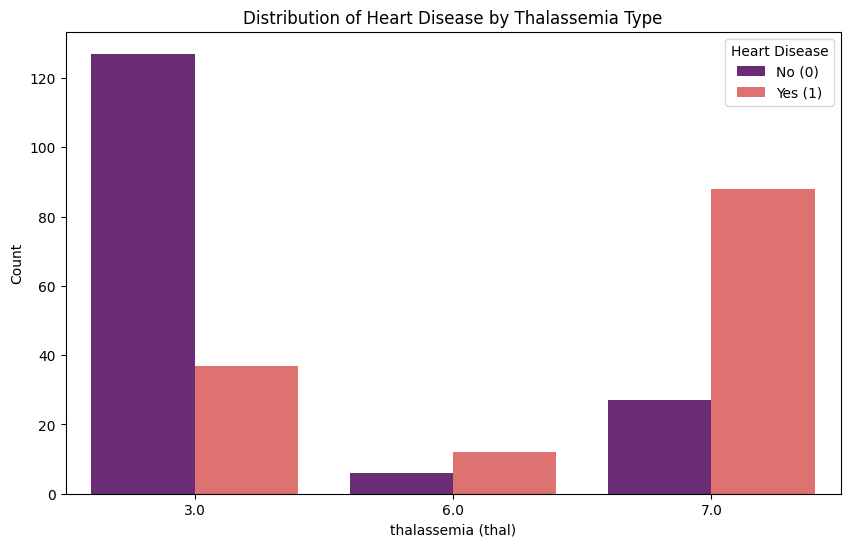

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Spearman correlation matrix
spearman_corr = df_cleaned.corr(method='spearman')

# Plotting the Spearman correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

# Create a grouped bar chart for cp vs target
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='cp', hue='target', palette='viridis')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease by Chest Pain Type')
plt.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])
plt.show()

# Create a grouped bar chart for thal vs target
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='thal', palette='magma', hue='target')
plt.xlabel('thalassemia (thal)')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease by Thalassemia Type')
plt.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])
plt.show()